In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras import layers


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [8]:
train_images[0].shape

(28, 28)

3


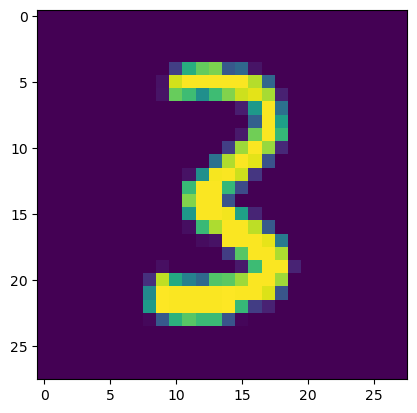

In [9]:
import matplotlib.pyplot as plt

plt.imshow(train_images[50000])
print(train_labels[50000])

In [10]:


train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [11]:
train_images.shape
test_images.shape

(10000, 28, 28, 1)

In [12]:
model=Sequential(
    [
        layers.Conv2D(32,(3,3),activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax')
    ]
)

C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile( optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [14]:
model.save('model.h5')

In [18]:
history=model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels),
         callbacks=[tensorflow_callback,early_stopping_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - accuracy: 0.8905 - loss: 0.3465 - val_accuracy: 0.9843 - val_loss: 0.0450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9854 - loss: 0.0454 - val_accuracy: 0.9890 - val_loss: 0.0336
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9886 - val_loss: 0.0343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9921 - loss: 0.0248 - val_accuracy: 0.9888 - val_loss: 0.0366
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9918 - val_loss: 0.0286


In [68]:
new_history=model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels),
         callbacks=[tensorflow_callback,early_stopping_callback])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9958 - loss: 0.0129 - val_accuracy: 0.9902 - val_loss: 0.0342
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accuracy: 0.9901 - val_loss: 0.0324
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9964 - loss: 0.0108 - val_accuracy: 0.9915 - val_loss: 0.0275
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9978 - loss: 0.0065 - val_accuracy: 0.9917 - val_loss: 0.0301
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9972 - loss: 0.0085 - val_accuracy: 0.9897 - val_loss: 0.0379
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9976 - loss: 0.0071 - val_accuracy: 0.9932 - val_loss: 0.0279
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9984 - loss: 0.0048 - val_accuracy: 0.9905 - val_loss: 0.0371
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9981 -

In [69]:
predictions=model.predict(test_images)
new_predictions=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [16]:
import datetime
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)


In [17]:
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [21]:
%load_ext tensorboard

In [22]:
import tensorboard
%tensorboard --logdir logs/fit

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [ ]:
!pip list

In [23]:
loss,accuracy=model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9897 - loss: 0.0371


In [24]:
print(loss,accuracy)

0.028624948114156723 0.9918000102043152


In [25]:
train_loss=history.history['loss']


In [70]:
new_train_loss=new_history.history['loss']

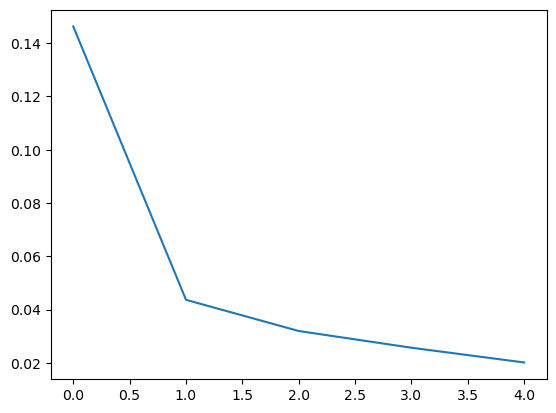

In [73]:
plt.plot(train_loss)


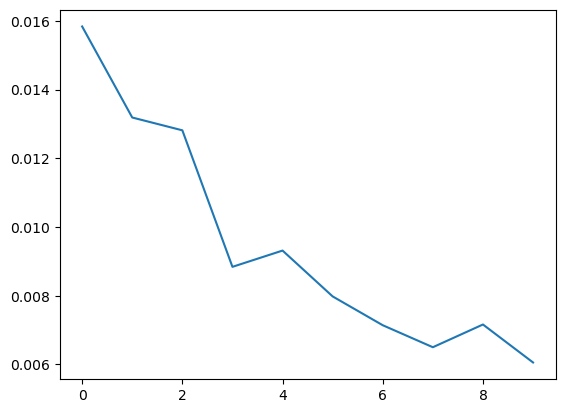

In [72]:
plt.plot(new_train_loss)

In [27]:
val_loss = history.history['val_loss']

In [74]:
new_val_loss=new_history.history['val_loss']

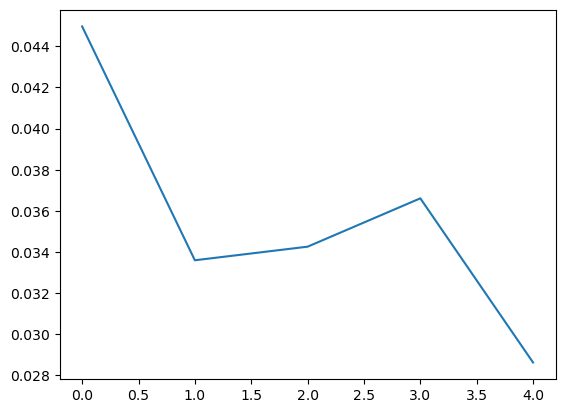

In [28]:
plt.plot(val_loss)

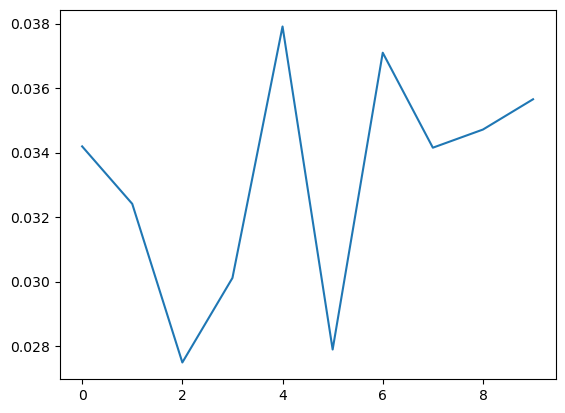

In [75]:
plt.plot(new_val_loss)

In [29]:
val_loss

[0.044966086745262146,
 0.033596064895391464,
 0.03425663337111473,
 0.0366080217063427,
 0.028624948114156723]

In [30]:
accuracy_plot=history.history['accuracy']

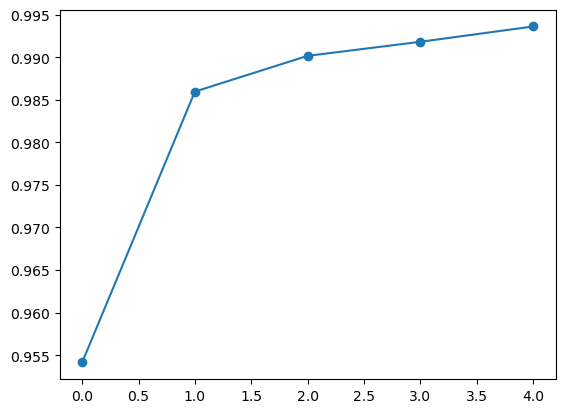

In [33]:
plt.plot(accuracy_plot,marker='o')

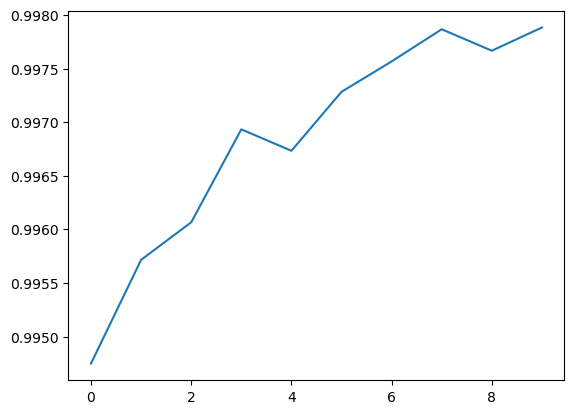

In [76]:
plt.plot(new_history.history['accuracy'])

In [41]:
test_images.shape

(10000, 28, 28, 1)

In [55]:
predictions=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [60]:
predictions[1]

array([1.4047610e-06, 2.4049559e-04, 9.9975461e-01, 1.0568739e-08,
       7.3438308e-08, 6.8542377e-10, 7.2947711e-07, 4.7930422e-07,
       2.1650681e-06, 4.6972981e-09], dtype=float32)

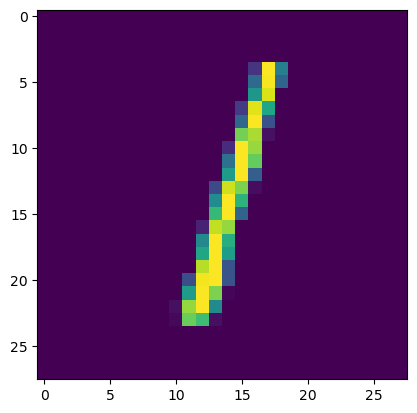

In [61]:
plt.imshow(test_images[2])

In [64]:
predictions=model.predict(test_images)
predicted_classes=np.argmax(predictions,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [65]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [66]:
predicted_classes.shape

(10000,)

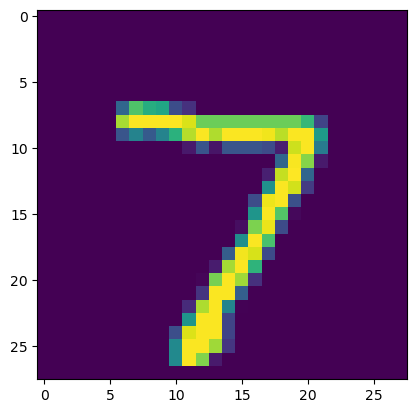

In [67]:
plt.imshow(test_images[0])